In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *

#My image
file_path = '../Dropbox Files/hel1.pma'
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
avg_frame_data = avg_frame_arr(file_path)

Image Size: 512 x 512
Sucessfully generated average frame


## Creation of CH1 array + CH1 image + CH1 image path

In [2]:
#Chanel 1 image
avg_frame_data_CH1 = avg_frame_data[:,:256]
print(avg_frame_data.shape)
print(avg_frame_data_CH1.shape)

(512, 512)
(512, 256)


In [3]:
#CH1 image path
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
# Save avg_frame_data_CH1 as image to CH1_img_path
Image.fromarray(avg_frame_data_CH1).save(CH1_img_path)

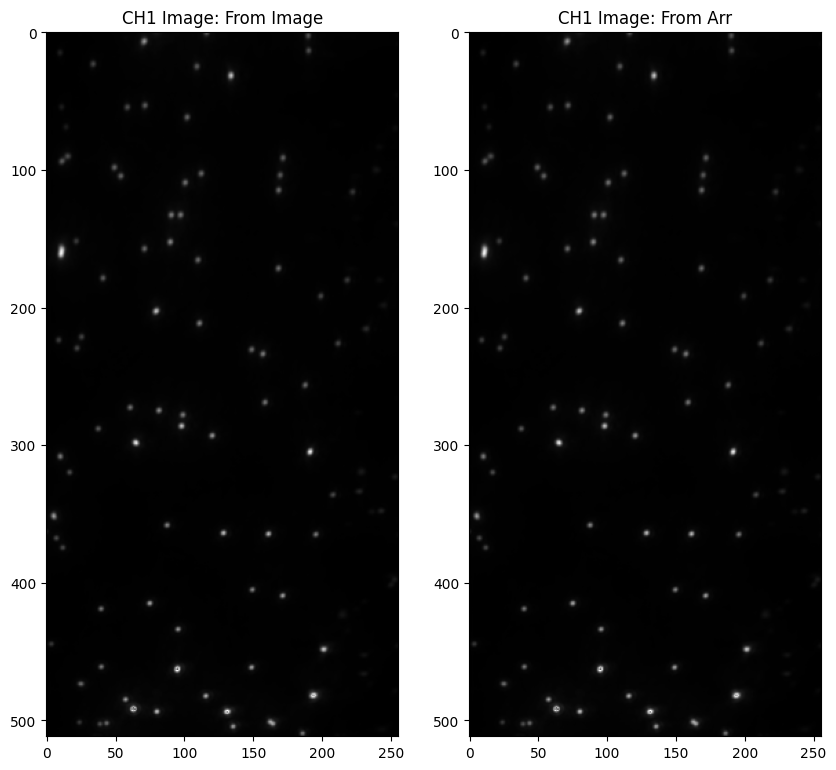

In [4]:
#Display Average frame using matplotlib
image_CH1 = io.imread(CH1_img_path)

fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(image_CH1, cmap='gray')
axes[0].set_title('CH1 Image: From Image')


axes[1].imshow(avg_frame_data_CH1, cmap='gray')
axes[1].set_title('CH1 Image: From Arr')

plt.show()


In [5]:
# Checking dimension
print(f"Image_CH1 shape: {image_CH1.shape}")
print(f"Avg_frame_data_CH1 shape: {avg_frame_data_CH1.shape}")


Image_CH1 shape: (512, 256)
Avg_frame_data_CH1 shape: (512, 256)


# Ideal parameteres:
# sigma=3, block_size=16, scaler_percent=32, boarder=10, max_rad=3

In [6]:
# import skimage.color as color
# sigma=3
# block_size=16
# scaler_percent=32
# std = 4*sigma

# image_func = io.imread(CH1_img_path).astype(np.uint8)
# if image_func.shape[2]==3:
#     image_func = color.rgb2gray(image_func)

# image_func = (image*255).astype(np.uint8)
# #should be 512, 512, 3
# height, width= image_func.shape
# image_1 = image_func.copy()
# min_intensity = np.min(image_1)
# max_intensity = np.max(image_1)

# threshold = min_intensity + (scaler_percent / 100.0) * (max_intensity - min_intensity)
    
# # Background estimation
# background = np.zeros((height, width), dtype=np.uint8)

# for i in range(8, height, block_size):
#     for j in range(8, width, block_size):
#           background[(i-8)//block_size, (j-8)//block_size] = np.min(image_1[i-8:i+8, j-8:j+8])

# # Subtract background
# background = np.clip(background.astype(np.uint8), 0, 255)
# image_1 = image_func - background
# image_2 = image_1.copy()
# med = np.median(image_1)

# # Apply threshold
# image_2[image_2 < (med + 3*std)] = 0

# peak_coords = peak_local_max(image_2, min_distance=int(sigma), threshold_abs=threshold)
# print(len(peak_coords))



In [7]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
print(f"First 10 peak coordinates:\n {peaks_coords_IDL_CH1[:10]}")
print(f"Peaks data type: {type(peaks_coords_IDL_CH1)}")
print(f"Number of peaks: {len(peaks_coords_IDL_CH1)}")

First 10 peak coordinates:
 [[493 131]
 [464  95]
 [160  11]
 [305 191]
 [483 193]
 [493  62]
 [298  65]
 [494  80]
 [449 201]
 [ 32 134]]
Peaks data type: <class 'numpy.ndarray'>
Number of peaks: 69


/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_47424/678426299.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


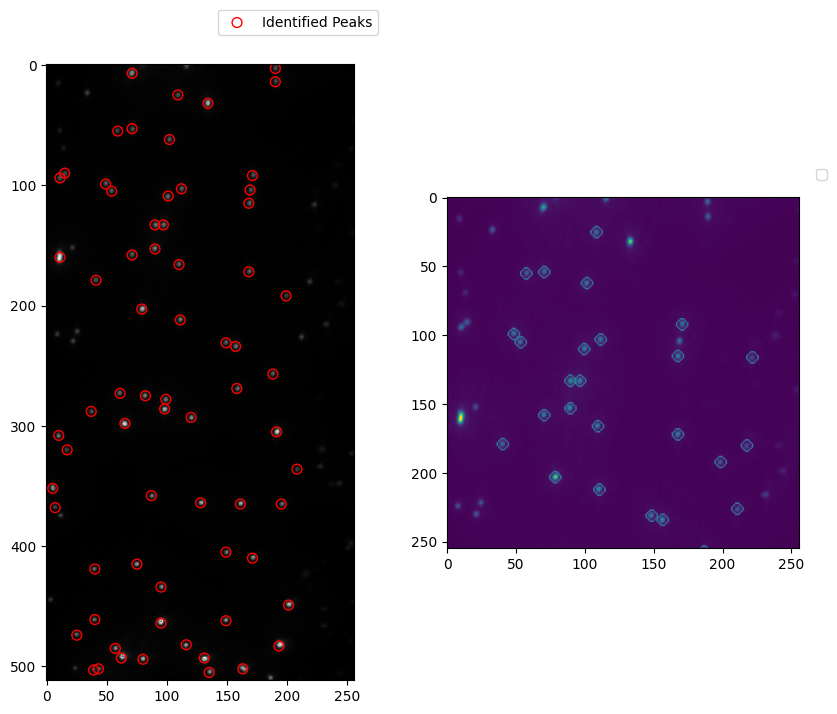

In [8]:
#Displaying CH1 image alongside IDL CH1 image from dropbox
f, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].imshow(image_CH1, cmap="grey")
axes[0].scatter(peaks_coords_IDL_CH1[:, 1], peaks_coords_IDL_CH1[:, 0], s=50, facecolors='none', edgecolors='r', label='Identified Peaks')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

#display ../pma files/hel1_ave_LF_Circ.tif next to plt.imshow(image) side by side
axes[1].imshow(hel1_ave_image[:, :256])
axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

## Exclude 10 x 10 pixel boarder

In [9]:
print(f"How many good peaks: {len(good_peak_finder(CH1_img_path)[0])}")
# print(f"First Good Peak: {good_peak_finder(CH1_img_path)[0][0]}")

How many good peaks: 56


/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_47424/2996240581.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


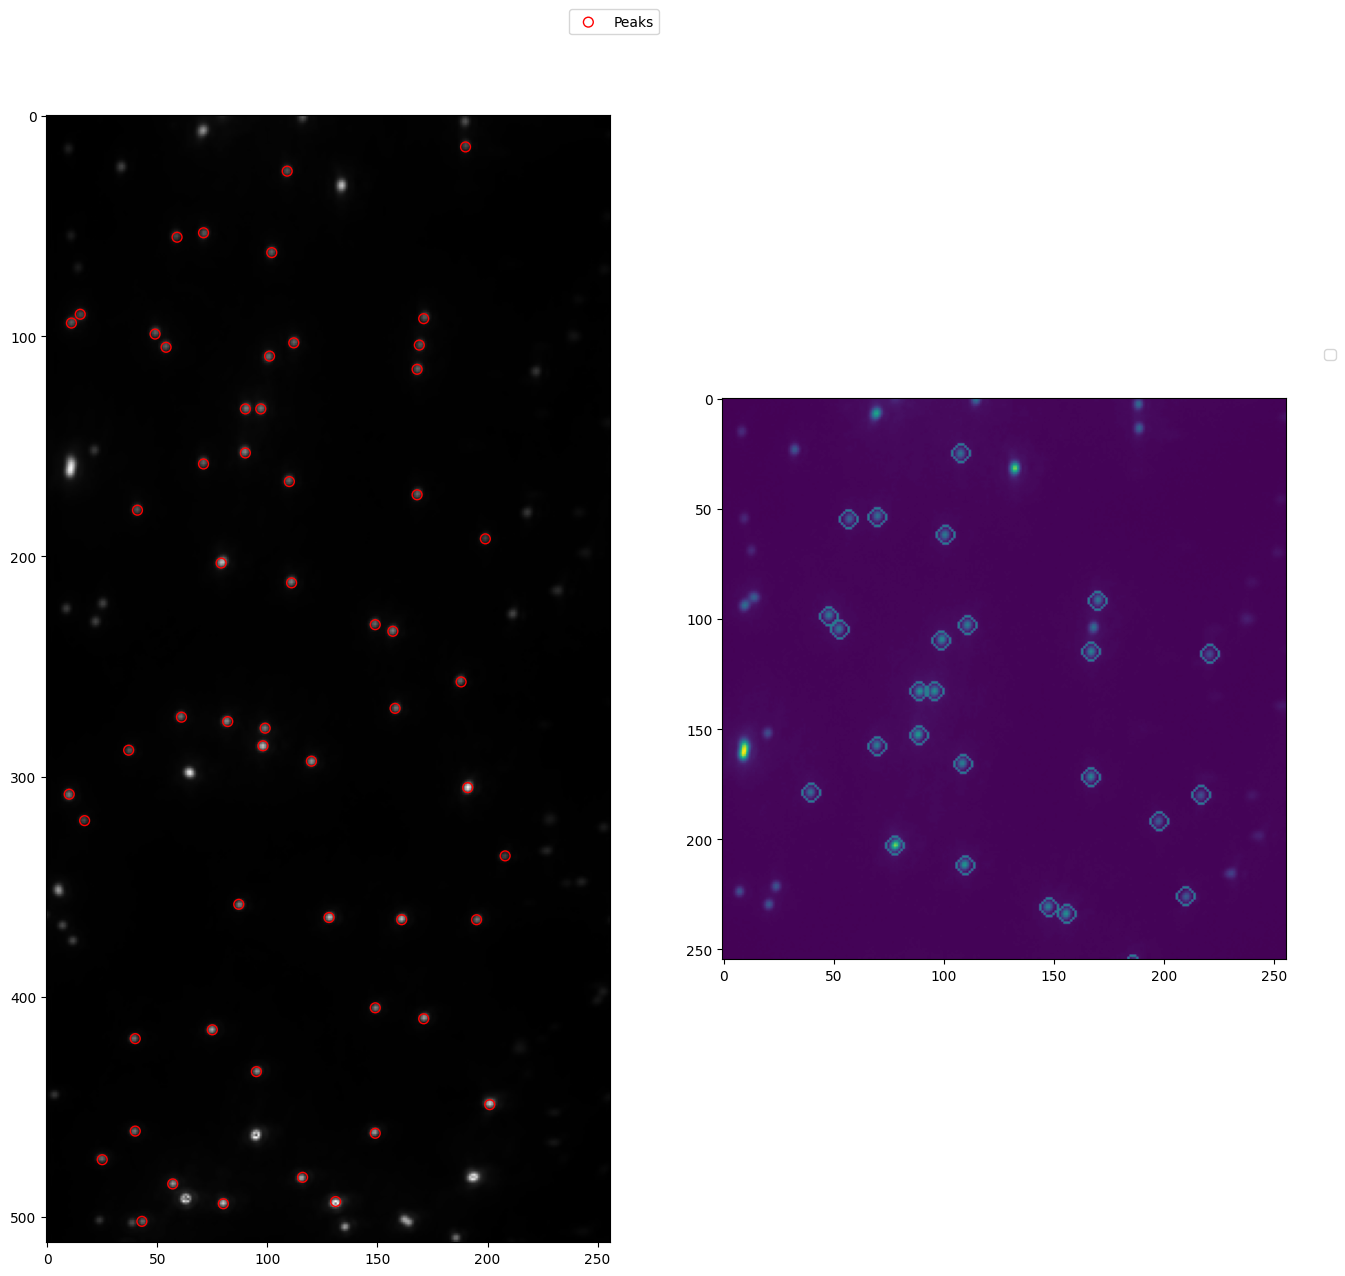

In [10]:
#Testing
good_peaks, bad_peaks = good_peak_finder(CH1_img_path)

f, axes = plt.subplots(1, 2, figsize=(16, 16))

axes[0].imshow(image_CH1, cmap="gray")
axes[0].scatter(good_peaks[:, 1], good_peaks[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

#display ../pma files/hel1_ave_LF_Circ.tif next to plt.imshow(image) side by side
axes[1].imshow(hel1_ave_image[:, :256])
axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()